In [1]:
#install libraries and packages to use with environment for analysis

import pandas as pd # used to provide tools to explore, clean, and analyze data.
import numpy as np # used to work with arrays
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import seaborn as sns # used for visualizations
import matplotlib.pyplot as plt # used for visualizations
%matplotlib inline
import scipy.stats
import pingouin as pg

In [2]:
#import the telecommunications churn dataset csv file to be used. 
#view dataset to ensure proper loading.

data = pd.read_csv('churn_clean.csv')
pd.set_option('display.max_columns', None)
data.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [3]:
#renaming unclear variables.
data = data.rename(columns = { "Item1": "Timely_Respd", "Item2": "Timely_Fixes",
                                "Item3": "Timely_Replc", "Item4": "Reliability", "Item5": "Options",
                                "Item6": "Respect_Resp", "Item7": "Courteous_Exch", 
                                "Item8": "Evidence_ActListen"})

In [4]:
data.shape

(10000, 50)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [6]:
# checking for duplicates
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [7]:
duplicates = data.duplicated('Customer_id')
data_duplicated = data[duplicates].sort_values(by='Customer_id')
print(data_duplicated[['Customer_id']])

Empty DataFrame
Columns: [Customer_id]
Index: []


In [8]:
data.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely_Respd,Timely_Fixes,Timely_Replc,Reliability,Options,Respect_Resp,Courteous_Exch,Evidence_ActListen
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [9]:
data.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [10]:
data.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Timely_Respd', 'Timely_Fixes', 'Timely_Replc',
       'Reliability', 'Options', 'Respect_Resp', 'Courteous_Exch',
       'Evidence_ActListen'],
      dtype='object')

In [11]:
print(f'CaseOrder: {data.CaseOrder.nunique()}')
print(f'Customer_id: {data.Customer_id.nunique()}')
print(f'Interaction: {data.Interaction.nunique()}')
print(f'UID: {data.UID.nunique()}')
print(f'City: {data.City.nunique()}')
print(f'State: {data.State.nunique()}')
print(f'County: {data.County.nunique()}')
print(f'Zip: {data.Zip.nunique()}')
print(f'Lat: {data.Lat.nunique()}')
print(f'Lng: {data.Lng.nunique()}')
print(f'Population: {data.Population.nunique()}')
print(f'Area: {data.Area.nunique()}')
print(f'TimeZone: {data.TimeZone.nunique()}')
print(f'Job: {data.Job.nunique()}')
print(f'Children: {data.Children.nunique()}')
print(f'Age: {data.Age.nunique()}')
print(f'Income: {data.Income.nunique()}')
print(f'Marital: {data.Marital.nunique()}')
print(f'Gender: {data.Gender.nunique()}')
print(f'Churn: {data.Churn.nunique()}')
print(f'Outage_sec_perweek: {data.Outage_sec_perweek.nunique()}')
print(f'Email: {data.Email.nunique()}')
print(f'Contacts: {data.Contacts.nunique()}')
print(f'Yearly_equip_failure: {data.Yearly_equip_failure.nunique()}')
print(f'Techie: {data.Techie.nunique()}')
print(f'Contract: {data.Contract.nunique()}')
print(f'Port_modem: {data.Port_modem.nunique()}')
print(f'Tablet: {data.Tablet.nunique()}')
print(f'InternetService: {data.InternetService.nunique()}')
print(f'Phone: {data.Phone.nunique()}')
print(f'Multiple: {data.Multiple.nunique()}')
print(f'OnlineSecurity: {data.OnlineSecurity.nunique()}')
print(f'OnlineBackup: {data.OnlineBackup.nunique()}')
print(f'DeviceProtection: {data.DeviceProtection.nunique()}')
print(f'TechSupport: {data.TechSupport.nunique()}')
print(f'StreamingTV: {data.StreamingTV.nunique()}')
print(f'StreamingMovies: {data.StreamingMovies.nunique()}')
print(f'PaperlessBilling: {data.PaperlessBilling.nunique()}')
print(f'PaymentMethod: {data.PaymentMethod.nunique()}')
print(f'Tenure: {data.Tenure.nunique()}')
print(f'MonthlyCharge: {data.MonthlyCharge.nunique()}')
print(f'Bandwidth_GB_Year: {data.Bandwidth_GB_Year.nunique()}')
print(f'Timely_Respd: {data.Timely_Respd.nunique()}')
print(f'Timely_Fixes: {data.Timely_Fixes.nunique()}')
print(f'Timely_Replc: {data.Timely_Replc.nunique()}')
print(f'Reliability: {data.Reliability.nunique()}')
print(f'Options: {data.Options.nunique()}')
print(f'Respect_Resp: {data.Respect_Resp.nunique()}')
print(f'Courteous_Exch: {data.Courteous_Exch.nunique()}')
print(f'Evidence_ActListen: {data.Evidence_ActListen.nunique()}')

CaseOrder: 10000
Customer_id: 10000
Interaction: 10000
UID: 10000
City: 6058
State: 52
County: 1620
Zip: 8583
Lat: 8563
Lng: 8630
Population: 5933
Area: 3
TimeZone: 25
Job: 639
Children: 11
Age: 72
Income: 9993
Marital: 5
Gender: 3
Churn: 2
Outage_sec_perweek: 9986
Email: 23
Contacts: 8
Yearly_equip_failure: 6
Techie: 2
Contract: 3
Port_modem: 2
Tablet: 2
InternetService: 3
Phone: 2
Multiple: 2
OnlineSecurity: 2
OnlineBackup: 2
DeviceProtection: 2
TechSupport: 2
StreamingTV: 2
StreamingMovies: 2
PaperlessBilling: 2
PaymentMethod: 4
Tenure: 9996
MonthlyCharge: 750
Bandwidth_GB_Year: 10000
Timely_Respd: 7
Timely_Fixes: 7
Timely_Replc: 8
Reliability: 7
Options: 7
Respect_Resp: 8
Courteous_Exch: 7
Evidence_ActListen: 8


In [12]:
#dropping categorical variables with high cardinality( more than 5)
data.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Job','TimeZone','Timely_Respd', 'Timely_Fixes', 'Timely_Replc',
       'Reliability', 'Options', 'Respect_Resp', 'Courteous_Exch',
       'Evidence_ActListen'], axis=1, inplace=True)

In [13]:
#Chi-square test for independence. If the contract terms are associated with the churn status. 
#H0: The contract terms have no impact on churn, which is if a customer discontinued service within the last month. The two variables are independent.
#Ha: The contract terms have an impact on churn, which is if a customer discontinued service within the last month. The two variables are dependent.

data['Contract'].value_counts()

Month-to-month    5456
Two Year          2442
One year          2102
Name: Contract, dtype: int64

In [14]:
data['Churn'].value_counts()

No     7350
Yes    2650
Name: Churn, dtype: int64

In [15]:
observed_all= pd.crosstab(data['Churn'], data['Contract'], margins=True)
print(observed_all)
value= np.array([observed_all.iloc[0][0:3].values,
               observed_all.iloc[1][0:3].values])

Contract  Month-to-month  One year  Two Year    All
Churn                                              
No                  3422      1795      2133   7350
Yes                 2034       307       309   2650
All                 5456      2102      2442  10000


<AxesSubplot:xlabel='Churn'>

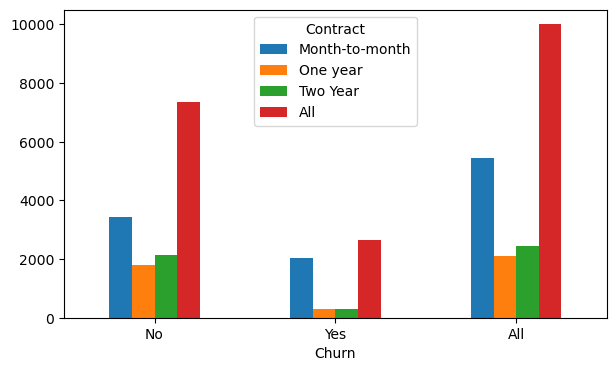

In [35]:
observed_all.plot.bar(figsize=(7,4), rot=0)

In [17]:
chistat, p, dof, expected = chi2_contingency(value)
print("Chi-Square statistic is: " + str(chistat))
print("Degree of Freedom is: " + str(dof))
print("Expected is: " + str(expected))

Chi-Square statistic is: 718.5915805949758
Degree of Freedom is: 2
Expected is: [[4010.16 1544.97 1794.87]
 [1445.84  557.03  647.13]]


In [18]:
#chi2 critical value
prob = 0.95
critical_val = chi2.ppf(q=0.95, df=2)
print('probability: %.3f, critical: %.3f, chi-squared stat: %.3f' % (prob, critical_val, chistat))

probability: 0.950, critical: 5.991, chi-squared stat: 718.592


In [19]:
if abs(chistat)>= critical_val:
    print("Reject the Null hypothesis(H0). The two variables are dependent.")
else: 
    print("Fail to reject the Null hypothesis(H0). The two variables are independent.")

Reject the Null hypothesis(H0). The two variables are dependent.


In [20]:
#alpha = 0.05, critical value at 0.05 and dof = 2 is 5.991
alpha = 1 - prob
print('significance: %.3f, p: %.3f' % (alpha, p))

significance: 0.050, p: 0.000


In [21]:
#alpha = 0.05, critical value at 0.05 and dof = 2 is 5.991
if p <=  alpha:
    print("Reject the Null hypothesis(H0). The two variables are dependent.")
else: 
    print("Fail to reject the Null hypothesis(H0). The two variables are independent.")

Reject the Null hypothesis(H0). The two variables are dependent.


In [22]:
expected, observed, stats = pg.chi2_independence(data=data, x = 'Contract', y= 'Churn')
print(stats[stats['test'] == 'pearson'])

      test  lambda        chi2  dof           pval    cramer  power
0  pearson     1.0  718.591581  2.0  9.116348e-157  0.268066    1.0


In [23]:
data.describe()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550
std,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852
min,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715
25%,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827
50%,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903
75%,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370
max,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530


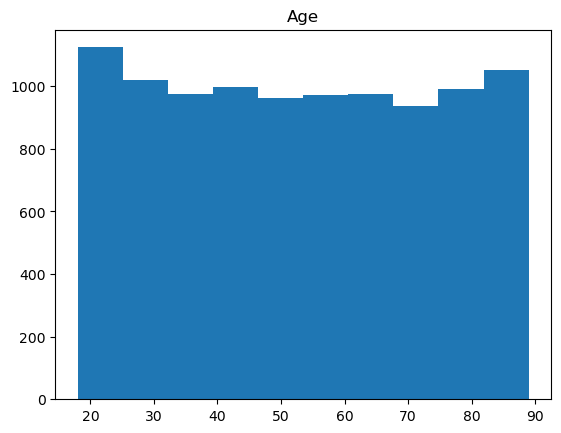

Text(0.5, 1.0, 'Income')

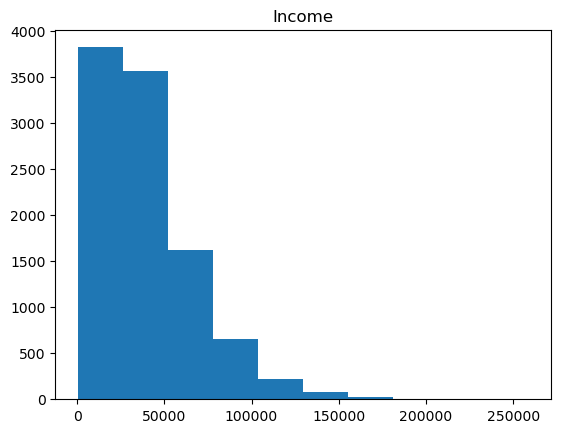

In [24]:
#identification of distribution via univariate statistics
plt.hist(data.Age)
plt.title('Age')
plt.show()
plt.hist(data.Income)
plt.title('Income')

In [25]:
groupedArea = data.groupby(by='Area').size()
groupedArea

Area
Rural       3327
Suburban    3346
Urban       3327
dtype: int64

<AxesSubplot:xlabel='Area'>

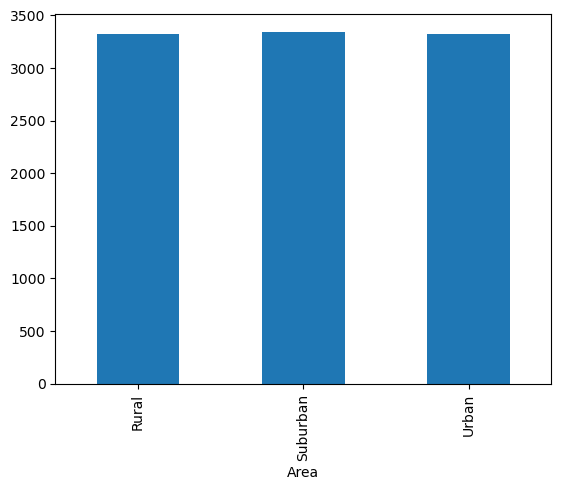

In [26]:
%matplotlib inline
groupedArea.plot.bar()

In [27]:
groupedInternetService = data.groupby(by='InternetService').size()
groupedInternetService

InternetService
DSL            3463
Fiber Optic    4408
None           2129
dtype: int64

<AxesSubplot:xlabel='InternetService'>

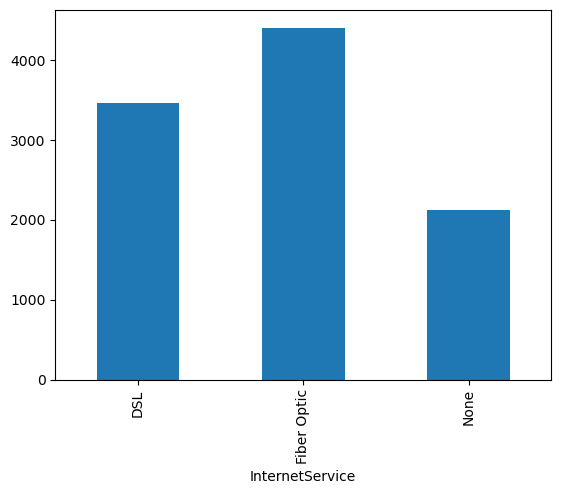

In [28]:
%matplotlib inline
groupedInternetService.plot.bar()

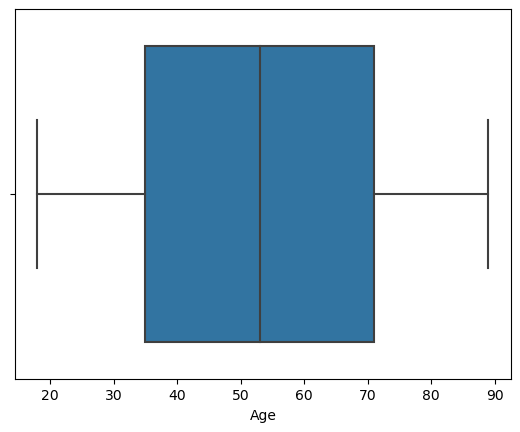

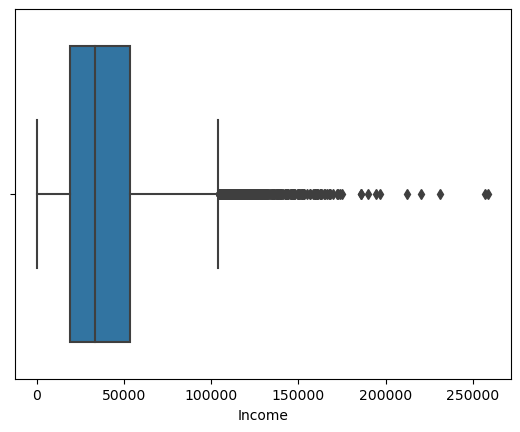

In [29]:
boxplot=sns.boxplot(x='Age',data=data)
plt.show()
boxplot=sns.boxplot(x='Income',data=data)
plt.show()

Text(0, 0.5, 'Population')

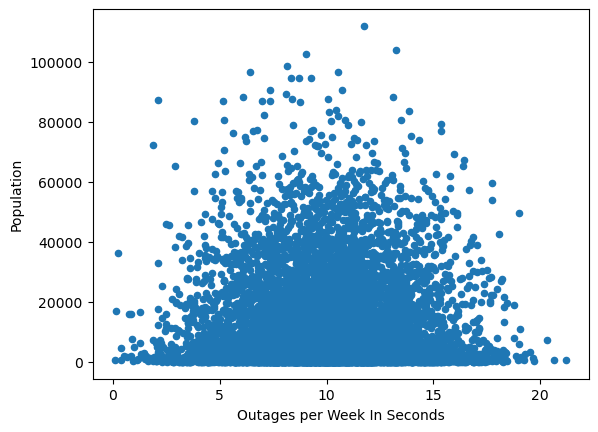

In [30]:
#identification of distribution via bivariate statistics
# 2 continuous variables using scatter plot
pa_scatter = data.plot.scatter(x='Outage_sec_perweek', y='Population')
pa_scatter.set_xlabel('Outages per Week In Seconds')
pa_scatter.set_ylabel('Population')

In [31]:
#identification of distribution via bivariate statistics
# 2 categorical variables using crosstab table and bar chart
 
crosstab_result=pd.crosstab(index=data['Area'], columns=data['InternetService'])
print(crosstab_result)

InternetService   DSL  Fiber Optic  None
Area                                    
Rural            1142         1477   708
Suburban         1170         1465   711
Urban            1151         1466   710


<AxesSubplot:xlabel='Area'>

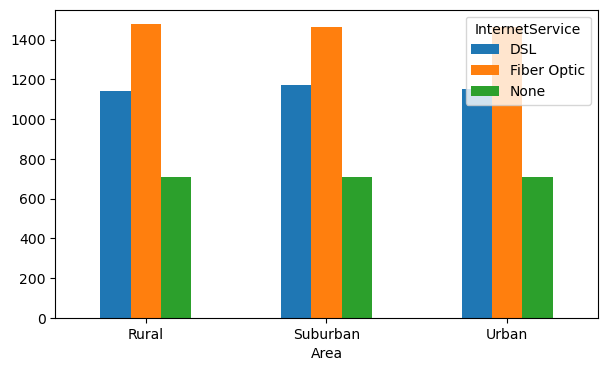

In [32]:
crosstab_result.plot.bar(figsize=(7,4), rot=0)

In [33]:
data.to_csv(r'AFCodeD207_clean.csv')